In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
dataset=pd.read_csv("PreProcessed_Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Q.1 - Replace the NaN values with correct value. And justify why you have chosen the same.

dataset["salary"].fillna(0,inplace=True)
dataset

dataset.isnull().sum()

### ANS : Found NaN values in the salary column. Replaced the NaN values with 0 because they wont receive salary since they are not placed. Besides the meaning of original dataset is retained by the replacement with zero.

### Q.2 - How many of them are not placed?

In [4]:
count = dataset['status'].value_counts().get('Not Placed', 0)
count

67

### Ans : 67

### Q.3- Find the reason for non placement from the dataset.

### Defining Quan & Qual

In [5]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [6]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [7]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

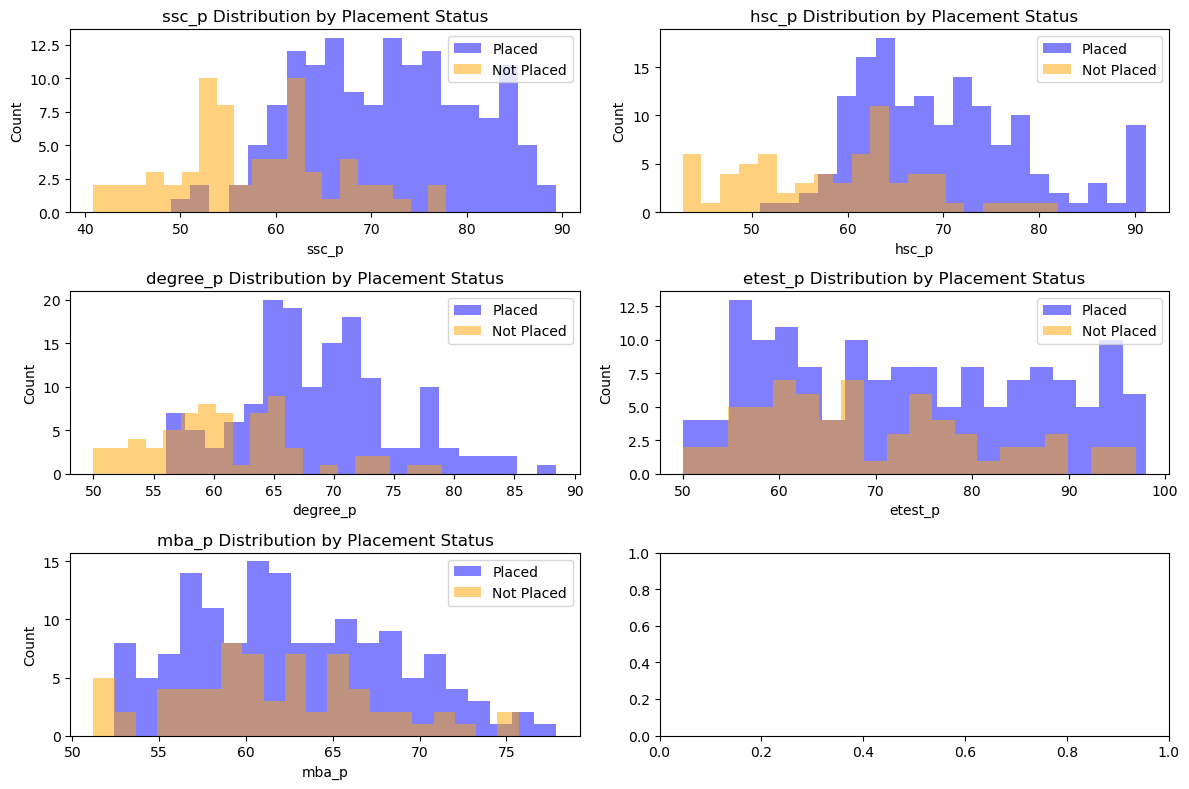

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of numerical columns you want to include
numerical_columns = quan

# Define the columns to exclude
exclude_columns = ['sl_no', 'salary']

# Filter out the excluded columns
filtered_numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Calculate the number of rows and columns for subplots
num_plots = len(filtered_numerical_columns)
num_cols = 2  # Two columns for 'Placed' and 'Not Placed'
num_rows = (num_plots + 1) // num_cols  # Calculate the number of rows needed

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through each numerical column and create histograms
for idx, column in enumerate(filtered_numerical_columns):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Create histograms for the current numerical column, grouped by placement status
    axes[row_idx][col_idx].hist(dataset[dataset['status'] == 'Placed'][column], bins=20, alpha=0.5, label='Placed', color='blue')
    axes[row_idx][col_idx].hist(dataset[dataset['status'] == 'Not Placed'][column], bins=20, alpha=0.5, label='Not Placed', color='orange')

    # Customize the subplot
    axes[row_idx][col_idx].set_xlabel(column)
    axes[row_idx][col_idx].set_ylabel('Count')
    axes[row_idx][col_idx].set_title(f'{column} Distribution by Placement Status')
    axes[row_idx][col_idx].legend()

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()


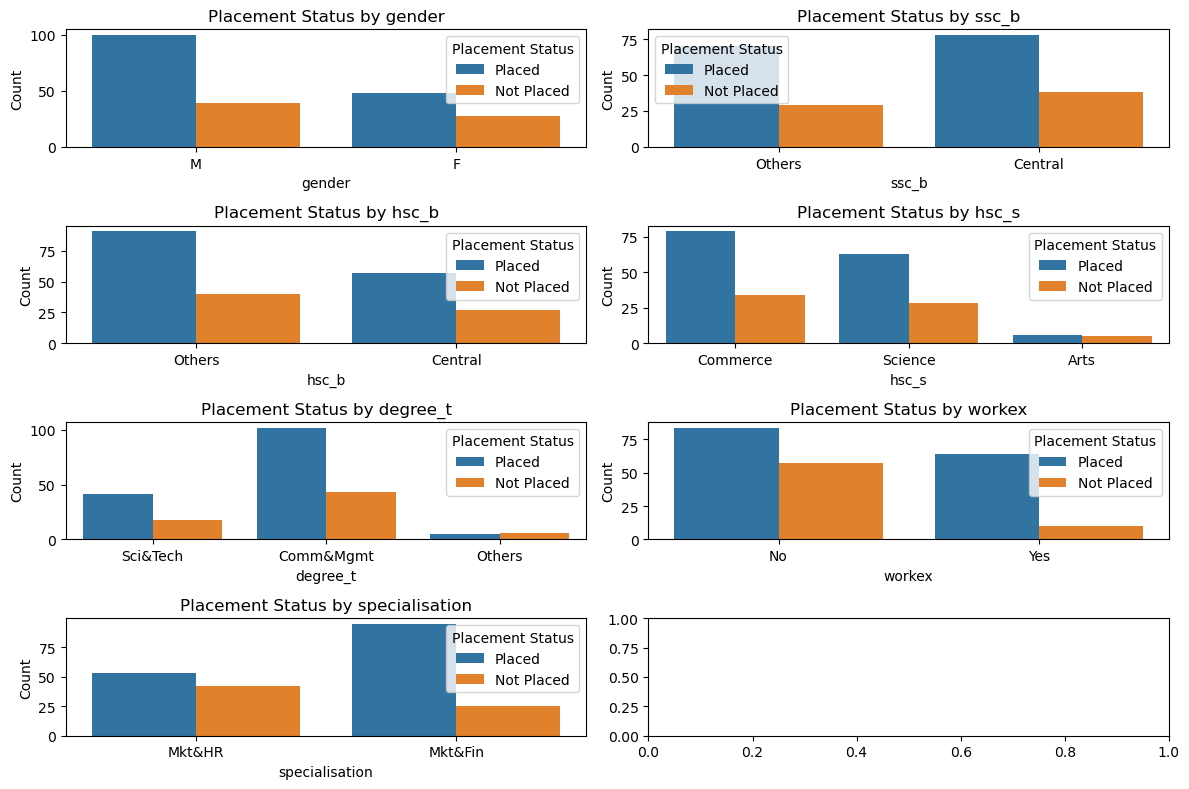

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical columns you want to include
categorical_columns = qual

# Define the column to exclude
exclude_column = 'status'

# Calculate the number of rows and columns for subplots
num_plots = len(categorical_columns) - (1 if exclude_column in categorical_columns else 0)
num_cols = 2  # Two columns for 'Placed' and 'Not Placed'
num_rows = (num_plots + 1) // num_cols  # Calculate the number of rows needed

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through each categorical column and create count plots
plot_idx = 0  # Index for tracking the subplot position
for column in categorical_columns:
    if column != exclude_column:
        row_idx = plot_idx // num_cols
        col_idx = plot_idx % num_cols

        # Create a count plot for the current categorical column
        sns.countplot(data=dataset, x=column, hue='status', ax=axes[row_idx][col_idx])

        # Customize the subplot
        axes[row_idx][col_idx].set_xlabel(column)
        axes[row_idx][col_idx].set_ylabel('Count')
        axes[row_idx][col_idx].set_title(f'Placement Status by {column}')
        axes[row_idx][col_idx].legend(title='Placement Status')

        plot_idx += 1

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

num_plots

### Ans: By analysising the relationship of categorical coloumn & numerical coloumn with respect to placement status from the above plots, we can clearly see that there is no significant influence of numerical coloumn on the  not placed placement status, where as categorical coloumns like  degree_t(Comm & Mmnt), work experience & specialisation(MKT & HR) has greater influence on the not placed placement status.

### Q.4- What is the kind of relation is between salary and mba_p?

In [10]:
dataset.corr()
#numeric_dataset = dataset.select_dtypes(include=['number'])
#correlation_matrix = numeric_dataset.corr()
#correlation_matrix

/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/3795343161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


### Ans: mba_p & salary exhibits a low degree positive correlation.This implies that individuals with higher MBA_p tend to have slightly higher salaries, but the relationship is not very strong.

### Q.5- Which specialization is getting minimum salary?

In [11]:
min_salary_by_specialization = dataset.groupby('specialisation')['salary'].min()
min_salary_specializations = min_salary_by_specialization[min_salary_by_specialization == min_salary_by_specialization.min()]
min_salary_specializations

specialisation
Mkt&Fin    0.0
Mkt&HR     0.0
Name: salary, dtype: float64

In [12]:
# Replace with the value you want to exclude
exclude_value = 0.0 

# Filter the DataFrame to exclude the specified value
filtered_dataset = dataset[dataset['salary'] != exclude_value]

# Check if there are any remaining rows after excluding the value
if not filtered_dataset.empty:
    
    # Find the minimum salary in the filtered DataFrame
    min_salary_by_specialization = filtered_dataset.groupby('specialisation')['salary'].min()
    min_salary_specializations = min_salary_by_specialization[min_salary_by_specialization == min_salary_by_specialization.min()]
    min_salary_specializations

In [13]:
 min_salary_specializations 

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

### Ans: Mkt&Fin & Mkt&HR are the 2 specialisations which receive a minimum wage of 200000 if we exclude the salary zero since it is the value which has been replaced for the non placed students inorder to retain the meaning of original dataset.

### Q.6 - How many of them are getting above 500000 salary?

In [14]:
threshold_salary = 500000
count_above_threshold = len(dataset[dataset['salary'] > threshold_salary])
count_above_threshold

3

### Ans: 3 members are getting the salary above 500000.

### Q.7 - Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [15]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

### Ans : Since p value is < 0.05 we reject null hypothesis(H0) & accept alternate hypothesis(H1) & this implies that there is  significant difference between etest_p and mba_p. The F-statistic and the small p-value support this conclusion.

### Q.8 - Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [16]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Sci_Tech = dataset[dataset['degree_t']=='Sci&Tech']['salary']
Mkt_HR = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(Sci_Tech, Mkt_HR)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [17]:
# Define the categorical values you want to compare
category_1 = 'Sci&Tech' 
category_2 = 'Mkt&HR'   

# Filter the DataFrame for each category
subset_1 = dataset[dataset['degree_t'] == category_1]
subset_2 = dataset[dataset['specialisation'] == category_2]

# Calculate the mean salary for each subset
mean_salary_1 = subset_1['salary'].mean()
mean_salary_2 = subset_2['salary'].mean()

# Print the mean salaries for each category
print(f'Mean Salary for {category_1}: {mean_salary_1}')
print(f'Mean Salary for {category_2}: {mean_salary_2}')


Mean Salary for Sci&Tech: 218627.11864406778
Mean Salary for Mkt&HR: 150842.1052631579


### Ans : Since p value is < 0.05 we reject null hypothesis(H0) & accept alternate hypothesis(H1) & this implies that there is significant difference between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salaries mean. Additionally, the positive t-statistic suggests that the mean salary for the 'Science & Technology' group is higher than the mean salary for the 'Marketing & HR' group.

### To conclude there is a significant difference in salaries between these two groups, with 'Science & Technology' having a higher mean salary at a 5% significance level.

### Q.9 - Convert the normal distribution to standard normal distribution for salary column.

/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/3264537401.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['salary'], ax=ax1)
/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/3264537401.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde

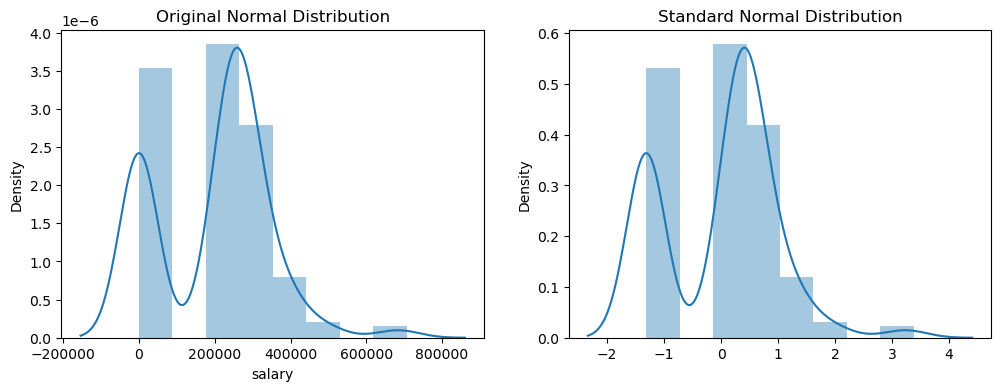

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(dataset['salary'], ax=ax1)
ax1.set_title("Original Normal Distribution")

# Define the stdNBgraph function
def stdNBgraph(dataset, ax):
    mean = dataset.mean()
    std = dataset.std()
    values = [i for i in dataset]
    z_score = [((j - mean) / std) for j in values]
    sns.distplot(z_score, kde=True, ax=ax)
    ax.set_title("Standard Normal Distribution")

# Call the stdNBgraph function on the same dataset and the second subplot
stdNBgraph(dataset['salary'], ax2)

# Show the merged plot
plt.show()


### Q.10 - What is the Probability Density Function of the salary range from 700000 to 900000?

In [19]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=197615.116, Standard Deviation=150305.844
The area between range(700000,900000):0.0004137812663830059


0.0004137812663830059

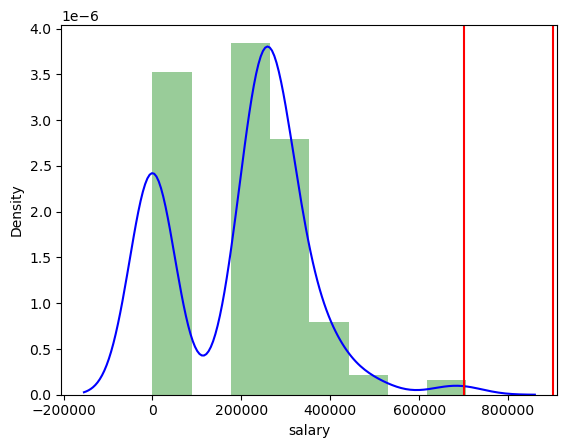

In [20]:
get_pdf_probability(dataset["salary"],700000,900000)

### Ans: The Probability Density Function of the salary range from 7,00,000 to 9,00,000 is 0.000413 which implies an extremly low probability is assosiated within this range, reflecting that extremly very small number of students receive the salary in this specified range in the distribution.

### Q. 11 - Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [21]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
etest_p = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p= dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest_p, mba_p)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

### Since p value is < 0.05 we reject null hypothesis(H0) & accept alternate hypothesis(H1) & this implies that there is significant dissimilarity between the etest_p and mba_p wrt degree_t(Sci&Tech). 

### Q.12 - Which parameter is highly correlated with salary?

In [22]:
dataset.corr()

/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,0.001217
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.001217,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


### Ans: Ssc_p is highly correlated with salary by the value 0.558475. This suggests a moderately positive linear relationship between ssc_p and salary. In other words, on average, the individuals with higher ssc_p tend to have higher salaries.

### Q.13 - Plot any useful graph and explain it.

Mean=62.278, Standard Deviation=5.833, Skew=0.314


/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_89315/3102433105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["mba_p"])


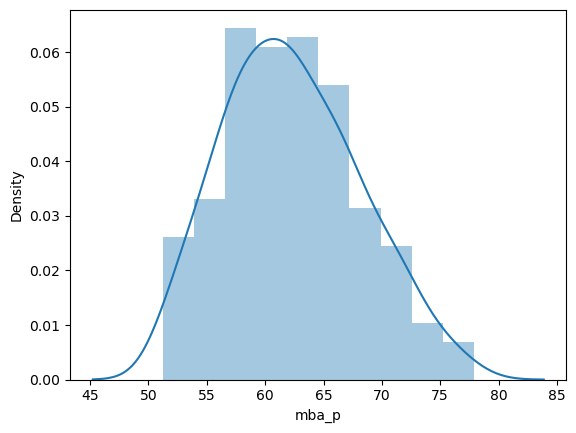

In [23]:
import seaborn as sns
sns.distplot(dataset["mba_p"])
mean=dataset['mba_p'].mean()
std=dataset['mba_p'].std()
skew=dataset["mba_p"].skew()
print('Mean=%.3f, Standard Deviation=%.3f, Skew=%.3f' % (mean,std, skew))

### Ans : The above plot gives the distribution of MBA pass marks. 
### From the graph , it is obvious that the average score i.e the mean in mba_p is 62.278, and it represents the central tendency of the data.  
### The standard deviation is 5.833, which indicates the spread or variability of the data around the mean. A larger standard deviation would result in a wider and flatter distribution, while a smaller standard deviation would result in a narrower and taller distribution.
### By visualizing the data using this plot, we get the insights about the distribution of MBA pass marks and how they are related to the mean and standard deviation.
### Additional Inference: MBA pass marks exhibits a positive skewness value of 0.314 which suggests a slight right-skew in the distribution, indicating the presence of a few high-scoring individuals with exceptionally high scores compared to the majority. However, the skewness is not very pronounced, and the distribution is relatively close to being symmetric.

### Miscellaneous

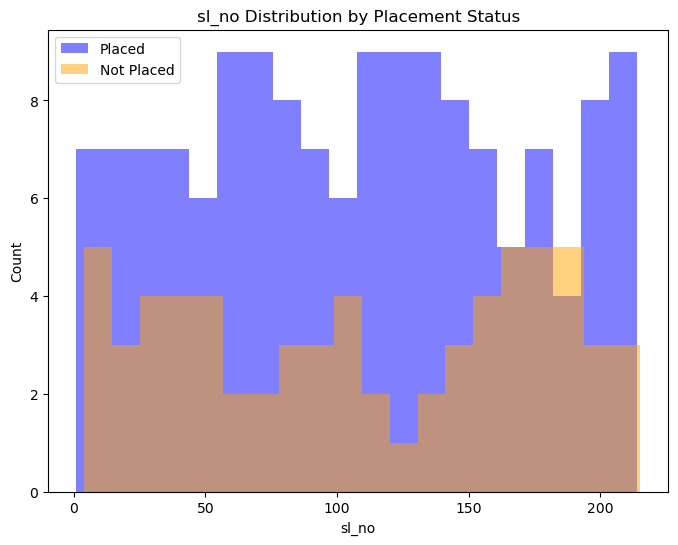

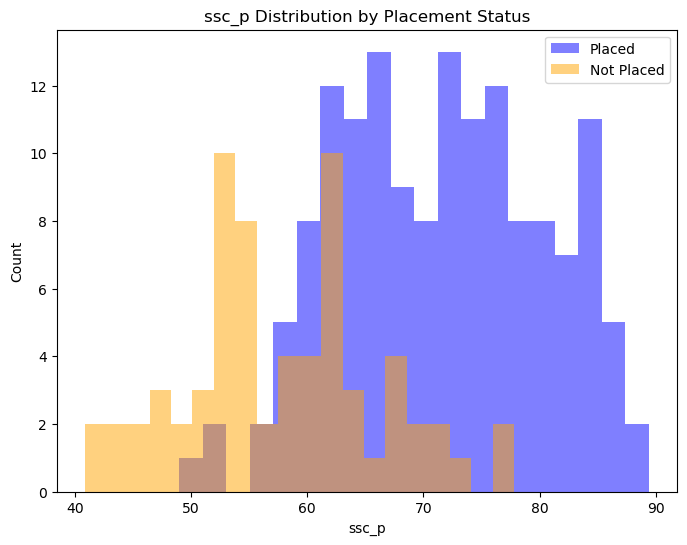

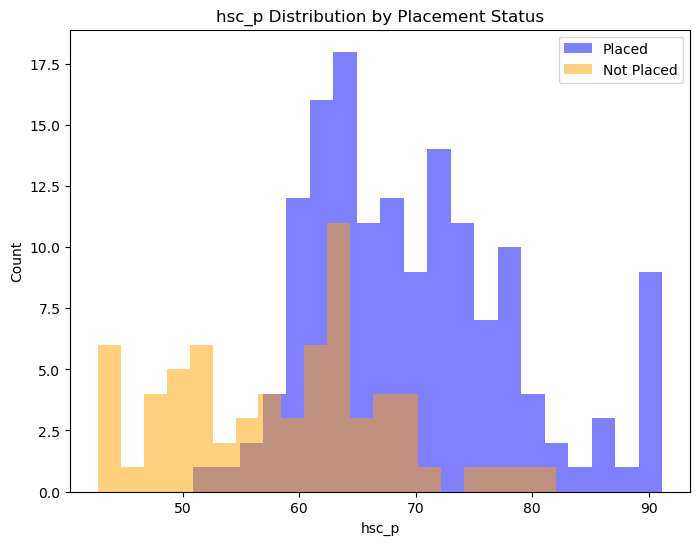

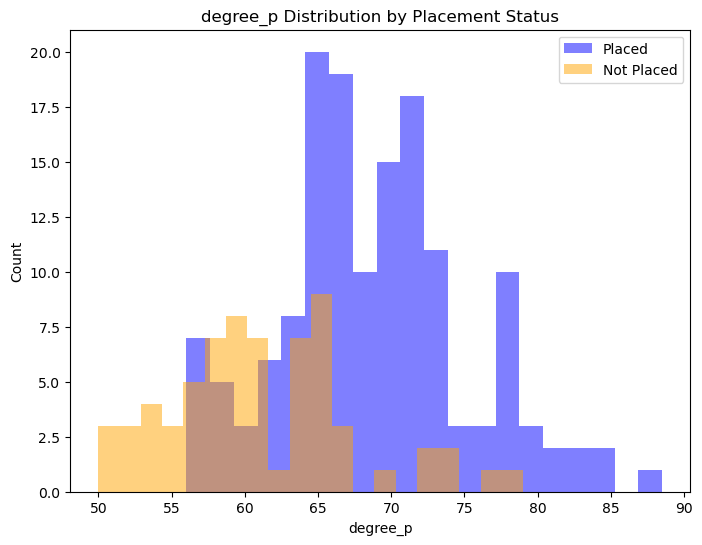

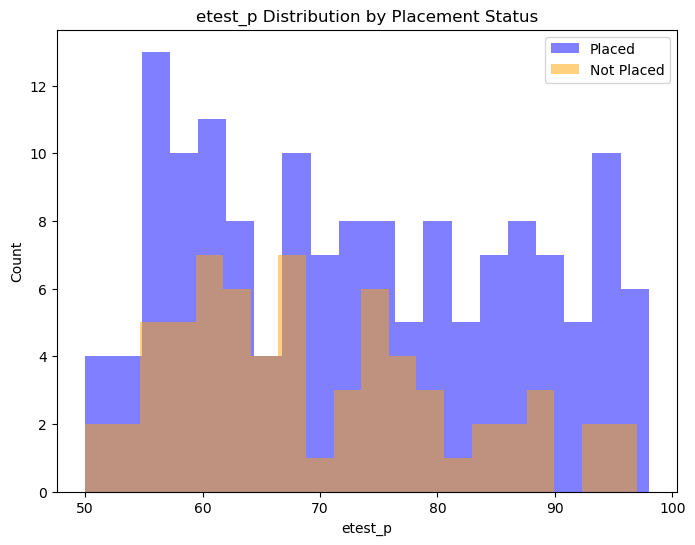

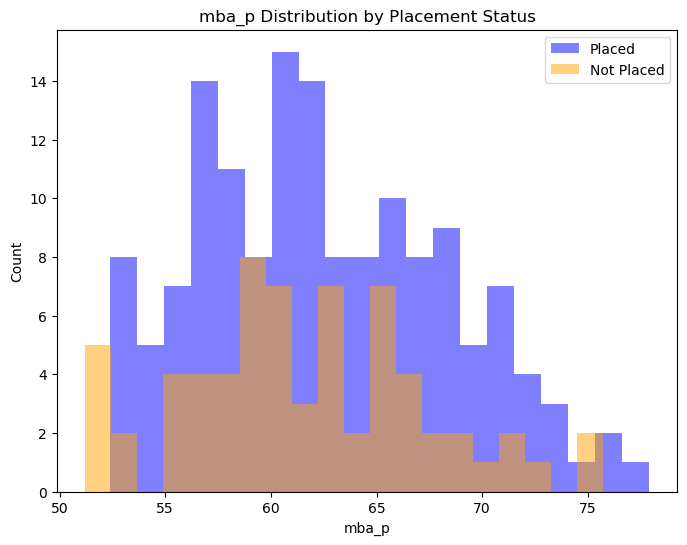

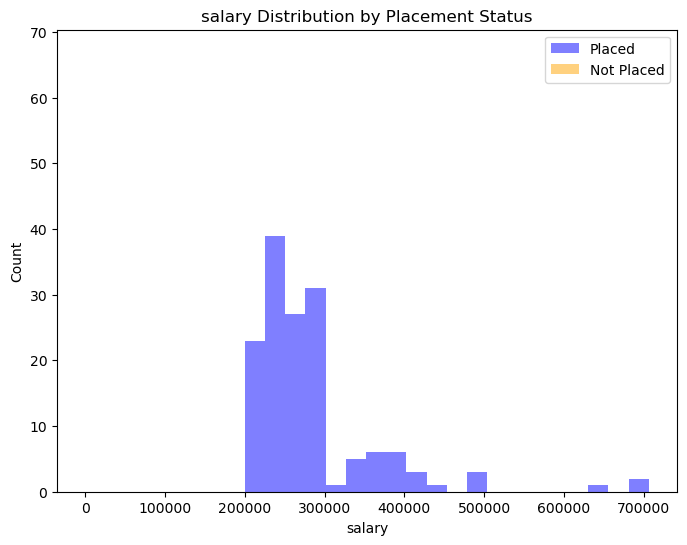

In [24]:
import matplotlib.pyplot as plt
# Define the list of numerical columns you want to include
numerical_columns = quan

# Define the column to exclude
exclude_column = 'sl_no', 'salary' 

for column in numerical_columns:
    if column != exclude_column:
        plt.figure(figsize=(8, 6))
        
        # Create histograms for the current numerical column, grouped by placement status
        plt.hist(dataset[dataset['status'] == 'Placed'][column], bins=20, alpha=0.5, label='Placed', color='blue')
        plt.hist(dataset[dataset['status'] == 'Not Placed'][column], bins=20, alpha=0.5, label='Not Placed', color='orange')
        
        # Customize the plot
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Placement Status')
        plt.legend()
        
        plt.show()


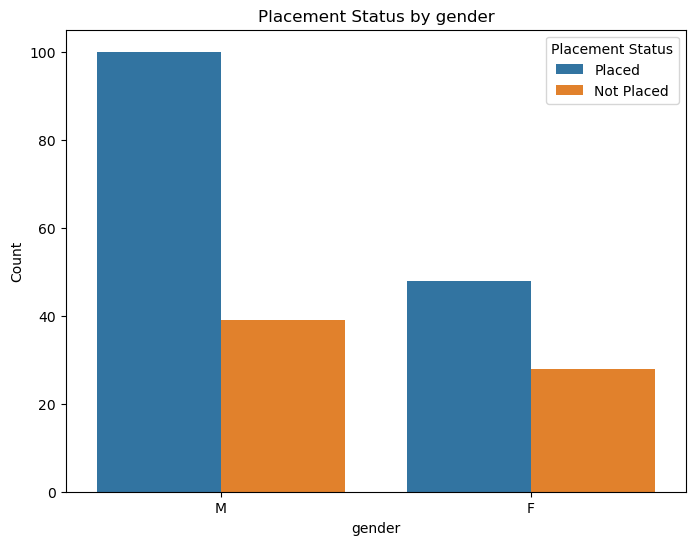

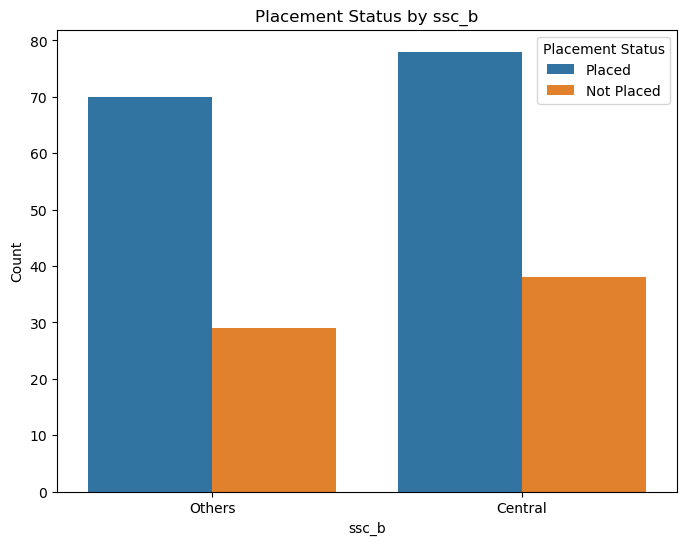

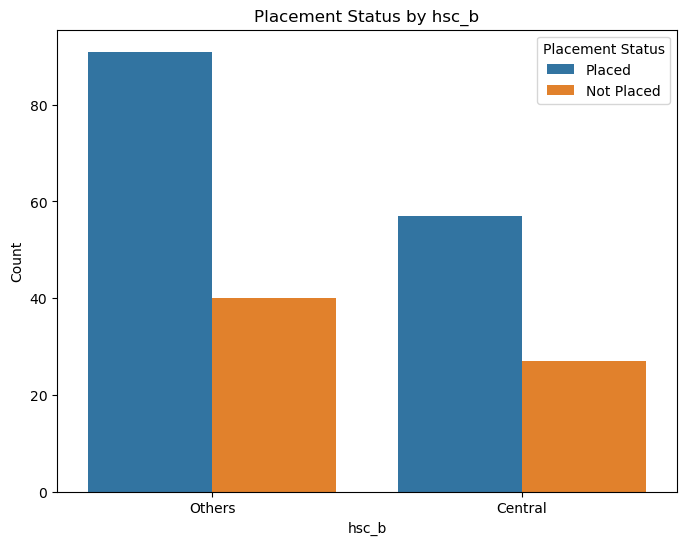

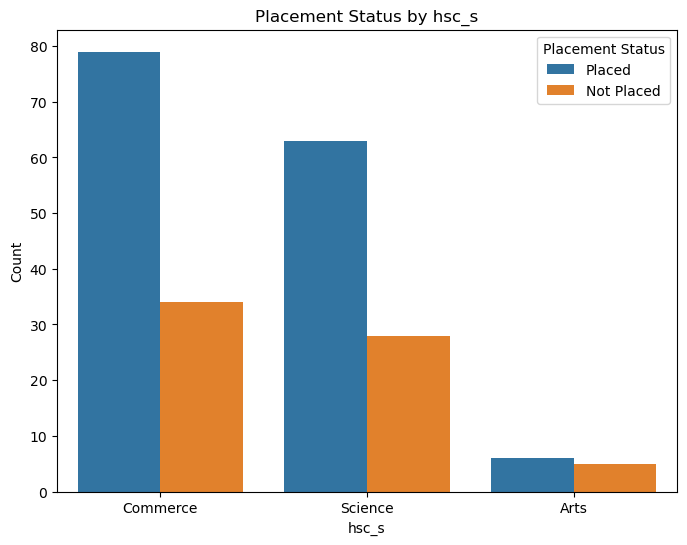

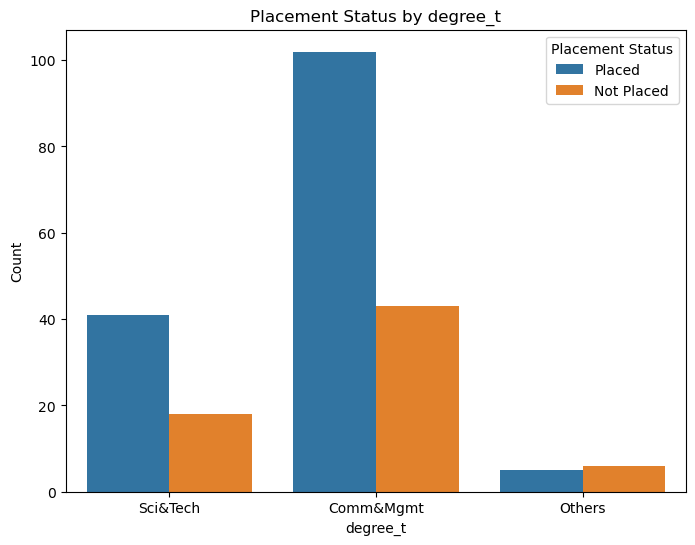

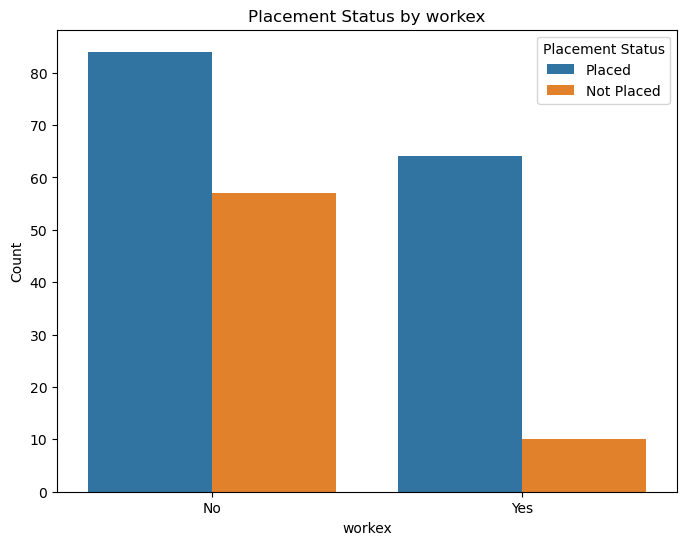

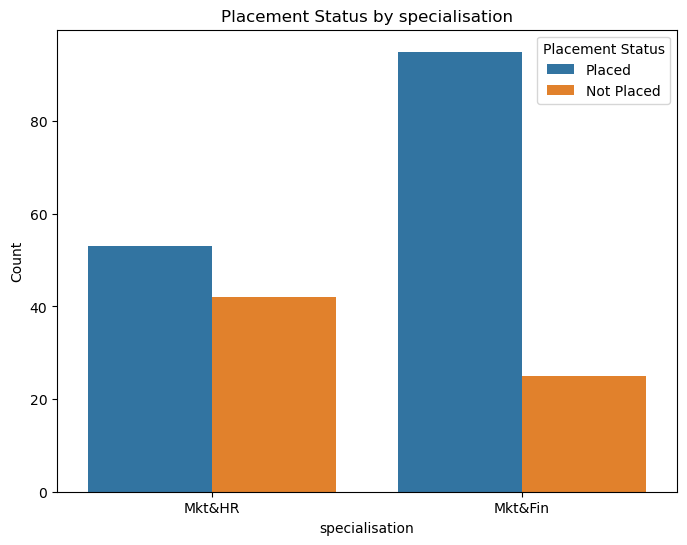

In [25]:
import seaborn as sns

# Define the list of categorical columns you want to include
categorical_columns = qual  

# Define the column to exclude
exclude_column = 'status'  

# Loop through each categorical column and create count plots, excluding the specified column
for column in categorical_columns:
    if column != exclude_column:
        plt.figure(figsize=(8, 6))
        
        # Create a count plot for the current categorical column
        sns.countplot(data=dataset, x=column, hue='status')
        
        # Customize the plot
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Placement Status by {column}')
        plt.legend(title='Placement Status')
        
        plt.show()